In [2]:
# Setup Dependencies and Constants

# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import api_key
from citipy import citipy

# Output File (CSV)
output_folder = "output_data"
output_filename = "cities"
output_file_type = "csv"
output_file = f"{output_folder}/{output_filename}.{output_file_type}"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
random_coordinates = 1500
total_cities = 500

# Weather API URL
url_stem = "http://api.openweathermap.org/data/2.5/weather?q="

print(f"{str(total_cities)} cities will be found by searching up to {str(random_coordinates)} coordinates\
 between latitude {str(lat_range[0])} and {str(lat_range[1])}, and\
 longitude {str(lng_range[0])} and {str(lng_range[1])}.")
print(f"The cities will be saved to: ./{output_file}")
print(f"Weather will be returned from {url_stem}<city>&appid=api_key&units=Imperial")

500 cities will be found by searching up to 1500 coordinates between latitude -90 and 90, and longitude -180 and 180.
The cities will be saved to: ./output_data/cities.csv
Weather will be returned from http://api.openweathermap.org/data/2.5/weather?q=<city>&appid=api_key&units=Imperial


In [3]:
# Generate Cities List

# Lists for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=lat_range[0], high=lat_range[1], size=random_coordinates)
lngs = np.random.uniform(low=lng_range[0], high=lng_range[1], size=random_coordinates)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total_cities = len(cities)
print(f"{str(total_cities)} cities found")

610 cities found


In [4]:
# Get Weather for a City

def print_weather(city_weather,city_number):
    city = dict(city_weather)
    print(f"City Weather #{str(city_number)} {city['city']} ({city['latitude']},{city['longitude']}): {city['temperature']}F {str(city['humidity'])}% Humidity {str(city['cloudiness'])}% Cloudy {str(city['wind speed'])} mph Wind")
    
def get_city_weather(city):
    url = f"{url_stem}{city}&appid={api_key}&units=Imperial"
    weather_response = requests.get(url)
    weather = weather_response.json()
    latitude = weather["coord"]["lat"]
    longitude = weather["coord"]["lon"]
    max_temp = weather["main"]["temp_max"]
    humidity = weather["main"]["humidity"]
    cloudiness = weather["clouds"]["all"]
    wind_speed = weather["wind"]["speed"]
    return {"City":city,
            "Latitude":latitude,
            "Longitude":longitude,
            "Maximum Temperature (F)":max_temp,
            "Humidity (%)":humidity,
            "Cloudiness (%)":cloudiness,
            "Wind Speed (MPH)":wind_speed}

In [5]:
# Initialize dataframe
city_num = 0
city_data = get_city_weather(cities[city_num])
print_weather(city_data,city_num)
citydf = pd.DataFrame(city_data,index=[city_num])
# Add additional cities
for city_num in range(1,total_cities):
    try:
        city_data = get_city_weather(cities[city_num])
        print_weather(city_data,city_num)
        citydf = citydf.append(pd.DataFrame(city_data,index=[city_num]))
    except:
        print(f"Skipping #{str(city_num)} {cities[city_num]}")
print(f"Weather for {str(len(citydf))} cities retrieved.")

# Export city weather data to CSV
citydf.to_csv(f"{output_file}")

# Display dataframe
citydf.head()

City Weather #0 dzhebariki-khaya (62.22,135.8): 38.93F 43% Humidity 0% Cloudy 3.04 mph Wind
City Weather #1 saskylakh (71.97,114.09): 27.41F 70% Humidity 0% Cloudy 1.99 mph Wind
City Weather #2 rikitea (-23.12,-134.97): 70.79F 71% Humidity 81% Cloudy 10.4 mph Wind
City Weather #3 jamestown (-33.21,138.6): 69.89F 36% Humidity 0% Cloudy 6.91 mph Wind
City Weather #4 dikson (73.51,80.55): 30.47F 81% Humidity 98% Cloudy 7.47 mph Wind
City Weather #5 parana (-7.52,-72.89): 76.01F 76% Humidity 0% Cloudy 1.81 mph Wind
City Weather #6 albany (42.65,-73.75): 48.51F 66% Humidity 1% Cloudy 4.45 mph Wind
City Weather #7 georgetown (6.8,-58.16): 79.47F 78% Humidity 0% Cloudy 9.17 mph Wind
City Weather #8 mataura (-46.19,168.86): 48.99F 73% Humidity 70% Cloudy 17 mph Wind
Skipping #9 tabiauea
City Weather #10 new norfolk (-42.78,147.06): 54.64F 45% Humidity 40% Cloudy 13.87 mph Wind
City Weather #11 provideniya (64.42,-173.23): 46.4F 81% Humidity 75% Cloudy 4.47 mph Wind
City Weather #12 punta arena

City Weather #105 praia da vitoria (38.73,-27.07): 68F 94% Humidity 20% Cloudy 12.35 mph Wind
City Weather #106 chokurdakh (70.62,147.9): 28.31F 85% Humidity 100% Cloudy 7.81 mph Wind
City Weather #107 butaritari (3.07,172.79): 84.83F 64% Humidity 44% Cloudy 6.98 mph Wind
City Weather #108 nanortalik (60.14,-45.24): 38.57F 91% Humidity 18% Cloudy 0.36 mph Wind
City Weather #109 uppsala (59.86,17.64): 50.86F 100% Humidity 90% Cloudy 1.12 mph Wind
City Weather #110 the valley (18.22,-63.06): 82.47F 83% Humidity 20% Cloudy 3.36 mph Wind
City Weather #111 jieshi (22.82,115.83): 86F 57% Humidity 0% Cloudy 1.01 mph Wind
City Weather #112 itaunja (27.08,80.92): 73.4F 100% Humidity 90% Cloudy 2.24 mph Wind
City Weather #113 homer (59.64,-151.54): 50.59F 87% Humidity 90% Cloudy 9.98 mph Wind
City Weather #114 yarada (17.65,83.27): 77F 94% Humidity 90% Cloudy 6.93 mph Wind
City Weather #115 nizhniy kuranakh (58.84,125.49): 41.45F 79% Humidity 100% Cloudy 5.17 mph Wind
City Weather #116 puerto ay

City Weather #200 sibolga (1.74,98.78): 80.51F 77% Humidity 69% Cloudy 6.67 mph Wind
City Weather #201 prince george (53.92,-122.75): 32.45F 60% Humidity 0% Cloudy 1.88 mph Wind
City Weather #202 upernavik (72.79,-56.15): 40.55F 60% Humidity 90% Cloudy 8.68 mph Wind
City Weather #203 ouesso (1.61,16.05): 69.71F 97% Humidity 100% Cloudy 4.68 mph Wind
City Weather #204 chitungwiza (-18.01,31.07): 60.8F 26% Humidity 0% Cloudy 10.29 mph Wind
City Weather #205 qaanaaq (77.48,-69.36): 30.65F 67% Humidity 91% Cloudy 9.82 mph Wind
Skipping #206 sakakah
City Weather #207 faanui (-16.48,-151.75): 77.09F 81% Humidity 2% Cloudy 19.71 mph Wind
City Weather #208 klaksvik (62.23,-6.59): 42.8F 87% Humidity 100% Cloudy 23.04 mph Wind
City Weather #209 zacualpan (21.25,-105.17): 79F 83% Humidity 90% Cloudy 2.24 mph Wind
City Weather #210 rio gallegos (-51.62,-69.22): 37.4F 93% Humidity 75% Cloudy 10.29 mph Wind
Skipping #211 umzimvubu
City Weather #212 cayenne (4.94,-52.33): 78.8F 88% Humidity 0% Cloudy

City Weather #302 yar-sale (66.83,70.83): 32.45F 95% Humidity 100% Cloudy 10.96 mph Wind
City Weather #303 beringovskiy (63.05,179.32): 41.99F 55% Humidity 2% Cloudy 5.08 mph Wind
City Weather #304 uglovskoye (51.36,80.19): 36.77F 62% Humidity 0% Cloudy 12.68 mph Wind
City Weather #305 jardim (-21.48,-56.15): 74.03F 46% Humidity 0% Cloudy 4.32 mph Wind
Skipping #306 geylegphug
City Weather #307 esperance (-33.86,121.89): 66.2F 63% Humidity 0% Cloudy 17.22 mph Wind
City Weather #308 port lincoln (-34.72,135.86): 56.03F 76% Humidity 0% Cloudy 18.7 mph Wind
City Weather #309 port hardy (50.7,-127.42): 49.01F 62% Humidity 2% Cloudy 5.17 mph Wind
City Weather #310 kodiak (39.95,-94.76): 77F 83% Humidity 90% Cloudy 12.75 mph Wind
City Weather #311 mount gambier (-37.83,140.78): 55.4F 62% Humidity 90% Cloudy 5.82 mph Wind
City Weather #312 murgab (37.5,61.97): 62.6F 51% Humidity 75% Cloudy 2.24 mph Wind
Skipping #313 belushya guba
City Weather #314 port macquarie (-31.43,152.91): 66.11F 63% H

City Weather #404 sur (22.57,59.53): 85.19F 56% Humidity 0% Cloudy 7.83 mph Wind
City Weather #405 matara (-3.48,29.48): 52.43F 84% Humidity 6% Cloudy 1.99 mph Wind
City Weather #406 izhevskoye (54.56,40.87): 48.65F 96% Humidity 100% Cloudy 9.15 mph Wind
Skipping #407 pemangkat
City Weather #408 vila (45.18,8.4): 59.85F 93% Humidity 0% Cloudy 2.24 mph Wind
City Weather #409 atuona (-9.8,-139.03): 79.25F 80% Humidity 21% Cloudy 20.27 mph Wind
Skipping #410 yershov
City Weather #411 villa carlos paz (-31.42,-64.5): 76.77F 56% Humidity 0% Cloudy 6.93 mph Wind
City Weather #412 kudat (6.89,116.84): 86F 74% Humidity 75% Cloudy 3.36 mph Wind
City Weather #413 floriano (-6.77,-43.02): 83.57F 47% Humidity 71% Cloudy 5.08 mph Wind
City Weather #414 meiganga (6.52,14.29): 63.77F 97% Humidity 98% Cloudy 1.81 mph Wind
City Weather #415 mayya (61.74,130.28): 37.4F 69% Humidity 0% Cloudy 2.24 mph Wind
City Weather #416 chicama (-7.84,-79.15): 60.8F 87% Humidity 90% Cloudy 9.17 mph Wind
City Weather 

City Weather #504 petropavlovsk-kamchatskiy (53.05,158.65): 48.2F 100% Humidity 90% Cloudy 3.44 mph Wind
City Weather #505 moron (18.56,-74.26): 80.51F 81% Humidity 100% Cloudy 4.47 mph Wind
Skipping #506 louisbourg
City Weather #507 alekseyevsk (57.84,108.35): 38.75F 60% Humidity 100% Cloudy 2.26 mph Wind
City Weather #508 muleba (-1.84,31.66): 65.39F 77% Humidity 90% Cloudy 2.1 mph Wind
City Weather #509 vincennes (48.85,2.44): 56.35F 77% Humidity 90% Cloudy 10.29 mph Wind
City Weather #510 spittal (55.76,-1.99): 49.01F 96% Humidity 20% Cloudy 7 mph Wind
City Weather #511 neringa (55.69,21.18): 53.6F 100% Humidity 100% Cloudy 6.93 mph Wind
City Weather #512 nouakchott (18.08,-15.98): 80.6F 78% Humidity 75% Cloudy 10.29 mph Wind
City Weather #513 aguimes (27.91,-15.45): 70.84F 83% Humidity 20% Cloudy 19.46 mph Wind
City Weather #514 xixiang (22.58,113.87): 88.97F 62% Humidity 0% Cloudy 10.29 mph Wind
City Weather #515 pittsburg (38.02,-121.89): 59.23F 48% Humidity 1% Cloudy 20.8 mph W

City Weather #607 aswan (24.09,32.9): 78.8F 41% Humidity 0% Cloudy 12.75 mph Wind
City Weather #608 rumoi (43.93,141.67): 68F 72% Humidity 40% Cloudy 3.36 mph Wind
City Weather #609 mkushi (-13.61,29.4): 59.63F 41% Humidity 0% Cloudy 3.15 mph Wind
Weather for 551 cities retrieved.


,city,latitude,longitude,temperature,humidity,cloudiness,wind speed
0,dzhebariki-khaya,62.22,135.80,38.93,43,0,3.04
1,saskylakh,71.97,114.09,27.41,70,0,1.99
2,rikitea,-23.12,-134.97,70.79,71,81,10.40
3,jamestown,-33.21,138.60,69.89,36,0,6.91
4,dikson,73.51,80.55,30.47,81,98,7.47


Text(0.5, 0, 'Latitude')

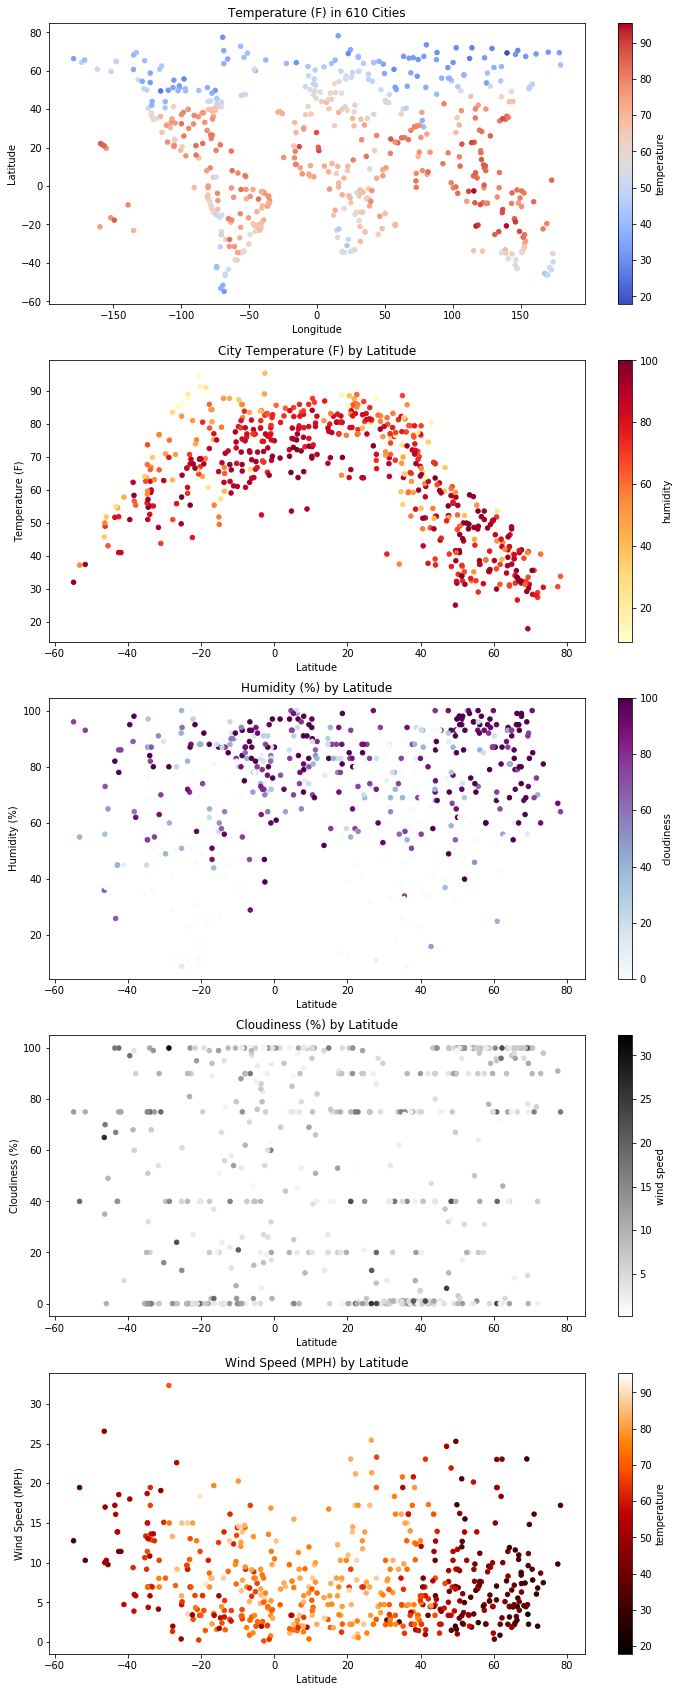

In [28]:
fig = plt.figure(figsize=(12,30))
ax0 = fig.add_subplot(511)
citydf.plot.scatter(x='Longitude',
                    y='Latitude',
                    c='Maximum Temperature (F)',
                    colormap='coolwarm',
                    title=f"Maximum Temperature (F) in {str(total_cities)} Cities",
                    ax=ax0)
#ax0.set_ylabel("Latitude")
#ax0.set_xlabel("Longitude")
ax1 = fig.add_subplot(512)
citydf.plot.scatter(x='Latitude',
                    y='Maximum Temperature (F)',
                    c='Humidity (%)',
                    colormap='YlOrRd',
                    title=f"Maximum Temperature (F) by Latitude",
                    ax=ax1)
#ax1.set_ylabel("Temperature (F)")
#ax1.set_xlabel("Latitude")
ax2 = fig.add_subplot(513)
citydf.plot.scatter(x='Latitude',
                    y='Humidity (%)',
                    c='Cloudiness (%)',
                    colormap='BuPu',
                    title=f"Humidity (%) by Latitude",
                    ax=ax2)
#ax2.set_ylabel("Humidity (%)")
#ax2.set_xlabel("Latitude")
ax3 = fig.add_subplot(514)
citydf.plot.scatter(x='Latitude',
                    y='Cloudiness (%)',
                    c='Wind Speed (MPH)',
                    colormap='binary',
                    title=f"Cloudiness (%) by Latitude",
                    ax=ax3)
#ax3.set_ylabel("Cloudiness (%)")
#ax3.set_xlabel("Latitude")
ax4 = fig.add_subplot(515)
citydf.plot.scatter(x='Latitude',
                    y='Wind Speed (MPH)',
                    c='Maximum Temperature (F)',
                    colormap='gist_heat',
                    title=f"Wind Speed (MPH) by Latitude",
                    ax=ax4)
#ax4.set_ylabel("Wind Speed (MPH)")
#ax4.set_xlabel("Latitude")